In [1]:
from aquapointer.density_canvas.DensityCanvas import DensityCanvas
import contourpy    
import numpy as np

In [2]:
def get_peak_count(canvas, num_levels=100):
    """Calculates the number of peaks in a density by calculating first
    the level curves, and then counting how many curves disappear once
    you go from the largest curve (lowest density) to the smallest (highest density)"""
    min = np.min(canvas._density)
    max = np.max(canvas._density)
    level_vals = np.linspace(min, max, num_levels)
    levels = []
    for val in level_vals:
        # calculate how many connected components there are for every level
        contours = contourpy.contour_generator(z=canvas._density).lines(val)
        levels.append(len(contours))
    n_components = 0
    for i in range(1, len(levels)):
        # if levels[i-1]-levels[i] is positive, it means that many curves have disappeared
        n_components += np.max([0, levels[i-1]-levels[i]])
    return n_components


In [3]:
#def benchmark():
    #average over
        #random_canvas
        #square lattice w and w/o dynamics
        #triangular lattice w and w/o dynamics
        #hexagonal lattice w and w/o dynamics
        #poisson w and w/o dynamics
    #metadata:
        #number of density peaks
        #ratio peaks / number of gaussians
        #number of gaussian centers
        #number of lattice points
        #energy levels
    #return


In [4]:
# define a canvas
origin = (-40, -40)
length = 80
npoints = 160
canvas = DensityCanvas(
    origin=origin,
    length_x=length,
    length_y=length,
    npoints_x=npoints,
    npoints_y=npoints,
)
# this is an empty canvas of length 40x40 with 80 points in each direction
# (so a resolution of 2 points per unit length)

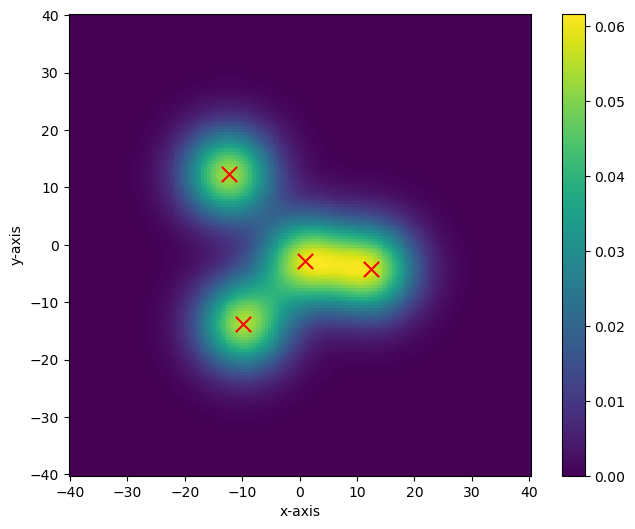

In [5]:
# extract random centers with a minimal distance
# and a padding from border
seed = 123488
n_centers = 4 #number of Gaussians
min_dist = 10 #minimal distance between gaussians
padding = 25 #minimal distance of Gaussian centers from border
amplitude = 10 #amplitude of the Gaussians
variance = 30 #variance of the Gaussians

canvas.set_randomized_gaussian_density(
    n_centers = n_centers,
    amplitude = amplitude,
    variance = variance,
    minimal_distance = min_dist,
    padding = padding,
    seed = seed
)

# To see the result, call the draw method with draw_centers=True
canvas.draw(draw_centers=True, figsize=(8,6))

In [6]:
get_peak_count(canvas, num_levels=20)

3

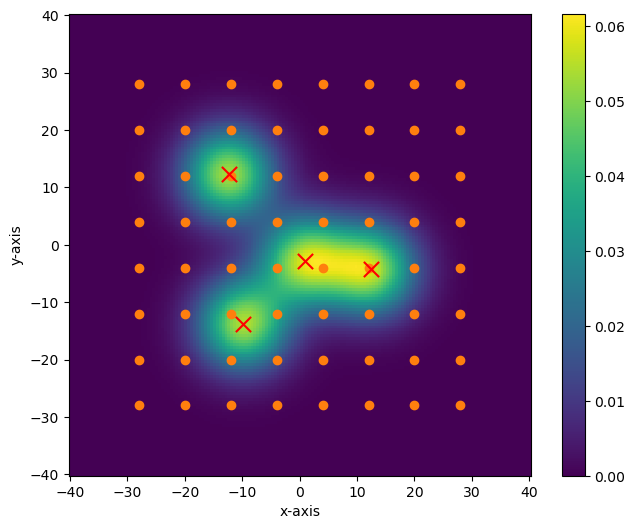

In [8]:
# Define a 8x8 rectangular lattice with spacing of 4
canvas.set_rectangular_lattice(num_x=8, num_y=8, spacing=8)
canvas.draw(draw_centers=True, draw_lattice=True, labels=False, figsize=(8,6))


# Define a Poisson disk lattice.
#canvas.set_poisson_disk_lattice(spacing=(2,10))
#canvas.draw(draw_centers=True, draw_lattice=True, labels=False, figsize=(8,6))


In [9]:
estimated_variance = 30
estimated_amplitude = 10

canvas.calculate_pubo_coefficients(
    p = 2, #order of the PUBO, p=2 effectively creates a QUBO
    params = [estimated_amplitude, estimated_variance]
)

canvas.force_lattice_size(16)

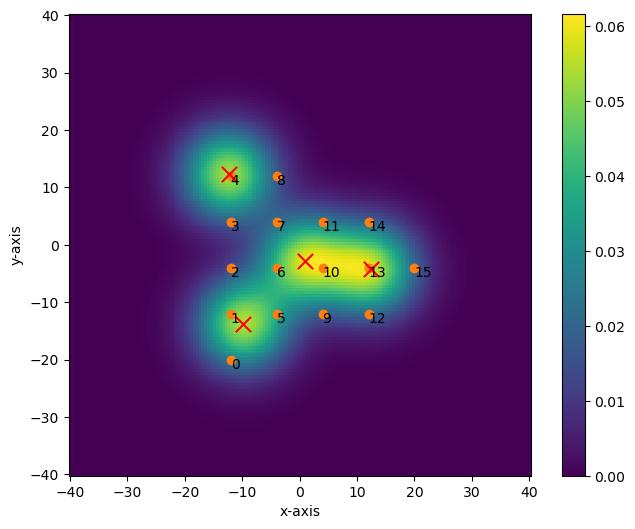

In [10]:
canvas.draw(draw_centers=True, draw_lattice=True, labels=True, figsize=(8,6))

In [11]:
canvas.lattice_dynamics(spacing=5, save_history=True)

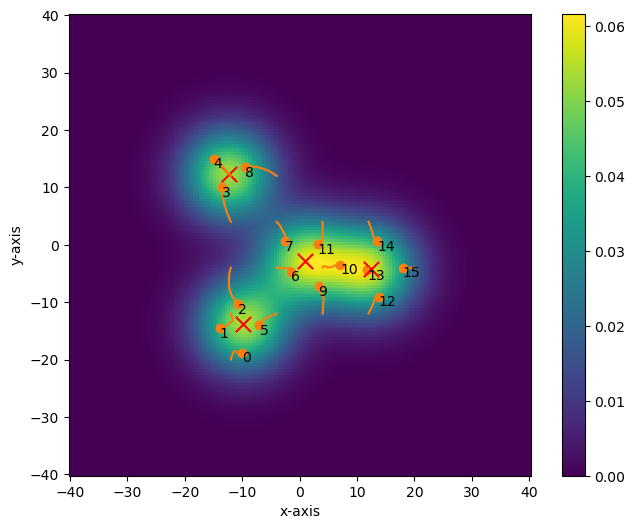

In [12]:
canvas.draw(draw_centers=True, draw_lattice=True, labels=True, lattice_history=True, figsize=(8,6))